====================Task 1====================

              precision    recall  f1-score   support

       anger       0.90      0.87      0.89       958
        fear       0.87      0.83      0.85       811
       happy       0.90      0.93      0.91      2119
        love       0.81      0.75      0.78       488
     sadness       0.91      0.94      0.92      1813
    surprise       0.84      0.71      0.77       270

    accuracy                           0.89      6459
   macro avg       0.87      0.84      0.85      6459
weighted avg       0.89      0.89      0.89      6459

     anger	AUC:	98.71%,		PRC:	93.17%
      fear	AUC:	98.55%,		PRC:	90.47%
     happy	AUC:	98.28%,		PRC:	96.55%
      love	AUC:	98.45%,		PRC:	86.05%
   sadness	AUC:	98.83%,		PRC:	96.78%
  surprise	AUC:	99.03%,		PRC:	81.63%


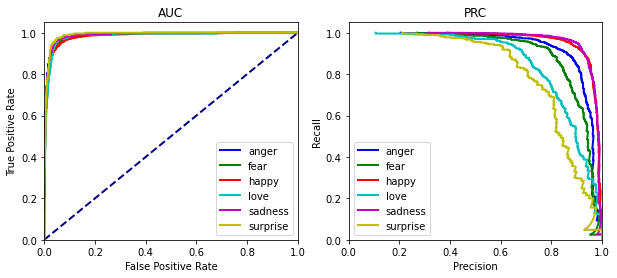

====================Task 2====================

Best Parameters:

svc__C: 1
tfidf__binary: True
tfidf__min_df: 1
tfidf__stop_words: english
tfidf__use_idf: False
best f1 score: 84.87%

Model Performance:

              precision    recall  f1-score   support

       anger       0.89      0.88      0.89       958
        fear       0.87      0.85      0.86       811
       happy       0.90      0.93      0.91      2119
        love       0.81      0.76      0.78       488
     sadness       0.91      0.92      0.92      1813
    surprise       0.81      0.68      0.74       270

    accuracy                           0.89      6459
   macro avg       0.87      0.84      0.85      6459
weighted avg       0.89      0.89      0.89      6459

     anger	AUC:	98.88%,		PRC:	93.58%
      fear	AUC:	98.87%,		PRC:	92.13%
     happy	AUC:	98.29%,		PRC:	96.54%
      love	AUC:	98.75%,		PRC:	86.94%
   sadness	AUC:	98.83%,		PRC:	96.73%
  surprise	AUC:	99.14%,		PRC:	83.08%


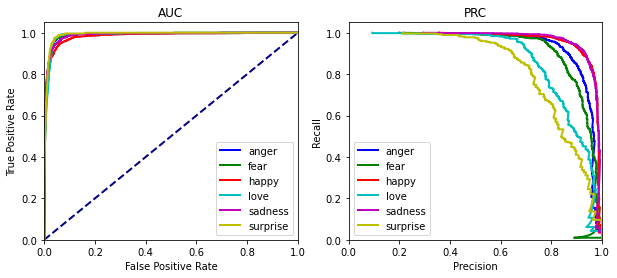

====================Task 3====================



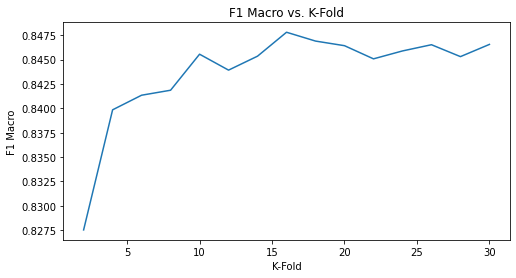

====================Task 4====================

Performance of Naive Bayes before modification:

              precision    recall  f1-score   support

       anger       0.96      0.16      0.28       958
        fear       0.88      0.12      0.21       811
       happy       0.59      0.98      0.73      2119
        love       1.00      0.01      0.02       488
     sadness       0.63      0.92      0.75      1813
    surprise       1.00      0.00      0.00       270

    accuracy                           0.62      6459
   macro avg       0.84      0.37      0.33      6459
weighted avg       0.74      0.62      0.52      6459

     anger	AUC:	94.19%,		PRC:	80.01%
      fear	AUC:	93.27%,		PRC:	72.32%
     happy	AUC:	95.24%,		PRC:	89.30%
      love	AUC:	86.96%,		PRC:	53.30%
   sadness	AUC:	96.04%,		PRC:	90.87%
  surprise	AUC:	81.00%,		PRC:	31.30%


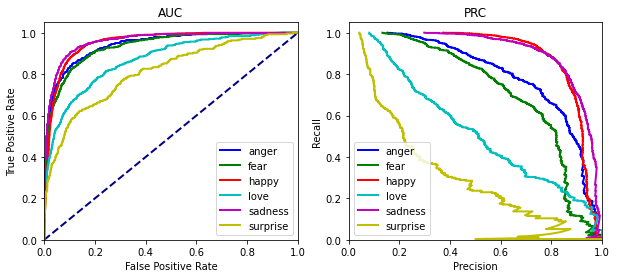


Classification report after modification:

              precision    recall  f1-score   support

       anger       0.85      0.75      0.80       958
        fear       0.80      0.71      0.75       811
       happy       0.83      0.80      0.81      2119
        love       0.60      0.69      0.64       488
     sadness       0.85      0.81      0.83      1813
    surprise       0.27      0.56      0.36       270

    accuracy                           0.77      6459
   macro avg       0.70      0.72      0.70      6459
weighted avg       0.79      0.77      0.78      6459



In [5]:
## Initializing

import pandas as pd
train = pd.read_csv("hw5_train.csv")
test = pd.read_csv("hw5_test.csv")

import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc,precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


## Functions for task 1

def svm_model(train_docs, train_y, test_docs, test_y,\
             dtm_options={'stop_words':None, 'min_df':1, 'use_idf':True, 'binary':'False'},
             svm_options = {'C':1}):
    
    tf = TfidfVectorizer(**dtm_options)
    X_train = tf.fit_transform(train_docs)
    svc = LinearSVC(**svm_options).fit(X_train, train_y)
    X_test = tf.transform(test_docs)   
    print(classification_report(test_y, svc.predict(X_test), target_names=sorted(test_y.unique())))
    
    list_roc = []
    list_pr = []
    list_color = ['b', 'g', 'r', 'c', 'm', 'y']
    prob = svc.decision_function(X_test)
    
    for i in sorted(test_y.unique()):
        binary_y = np.where(test_y==i, 1, 0)
        y_prob = prob[:, sorted(test_y.unique()).index(i)]
        fpr, tpr, thresholds_roc = roc_curve(binary_y, y_prob, pos_label=1)
        precision, recall, thresholds_pr = precision_recall_curve(binary_y, y_prob, pos_label=1)
        print("{:>10}\tAUC:\t{:.2%},\t\tPRC:\t{:.2%}".format(i, auc(fpr, tpr), auc(recall, precision)))
        list_roc.append([fpr, tpr])
        list_pr.append([recall, precision])        
   
    plt.rcParams['figure.figsize'] = (10, 4)
    plt.figure();
    plt.subplot(1, 2, 1)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.05]);
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.title('AUC');
    for i in range(len(sorted(test_y.unique()))):
        plt.plot(*list_roc[i], color=list_color[i], lw=2, label=sorted(test_y.unique())[i]);
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.05]);
    plt.xlabel('Precision');
    plt.ylabel('Recall');
    plt.title('PRC');
    for i in range(len(sorted(test_y.unique()))):
        plt.plot(*list_pr[i][::-1], color=list_color[i], lw=2, label=sorted(test_y.unique())[i]);
    plt.legend()
    
    plt.show()
    
print('='*20+'Task 1'+'='*20+'\n')

dtm_options={'stop_words':None, 'min_df':1, 'use_idf':True, 'binary':'False'}
svm_options = {'C':1}

svm_model(train["Text"], train["Emotion"],
          test["Text"], test["Emotion"], 
          dtm_options = dtm_options,
          svm_options = svm_options)


## Functions for task 2

def search_para(docs, y):
    
    mod = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])
    param = {'tfidf__use_idf': [True, False],
             'tfidf__binary': [True, False],
             'tfidf__stop_words': [None, 'english'],
             'tfidf__min_df': [1, 3],
             'svc__C': [0.5, 1, 2]}
    
    grid = GridSearchCV(mod, param_grid=param, scoring='f1_macro', cv=4)
    grid.fit(docs, y)
    
    for param_name in grid.best_params_:
        print("{0}: {1}".format(param_name, grid.best_params_[param_name]))

    print("best f1 score: {:.2%}".format(grid.best_score_))
    
print('='*20+'Task 2'+'='*20+'\n')

print('Best Parameters:\n')
search_para(train["Text"], train["Emotion"])
print('\nModel Performance:\n')
dtm_options={'stop_words':'english', 'min_df':1, 'use_idf':False, 'binary':True}
svm_options = {'C':1}

svm_model(train["Text"], train["Emotion"],
          test["Text"], test["Emotion"], 
          dtm_options = dtm_options,
          svm_options = svm_options)


## Functions for task 3

def k_fold(docs, y):
    
    tf = TfidfVectorizer()
    X = tf.fit_transform(docs)
    
    list_fold = list(range(2, 31, 2))
    list_score = []
    for i in list_fold:
        cv = cross_val_score(LinearSVC(), X, y, scoring='f1_macro', cv=i)
        list_score.append(np.mean(cv))
        
    plt.rcParams['figure.figsize'] = (8, 4)    
    plt.figure()
    plt.xlabel('K-Fold')
    plt.ylabel('F1 Macro')
    plt.title('F1 Macro vs. K-Fold')
    plt.plot(list_fold, list_score)  
    plt.show()

print('='*20+'Task 3'+'='*20+'\n')
k_fold(train["Text"], train["Emotion"])


## Functions for task 4

from sklearn.naive_bayes import MultinomialNB

def NB_model(train_docs, train_y, test_docs, test_y,\
             dtm_options={'stop_words':None, 'min_df':1, 'use_idf':True, 'binary':'False'}):
    
    tf = TfidfVectorizer(**dtm_options)
    X_train = tf.fit_transform(train_docs)
    NB = MultinomialNB().fit(X_train, train_y)
    X_test = tf.transform(test_docs)   
    print(classification_report(test_y, NB.predict(X_test), target_names=sorted(test_y.unique()), zero_division=1))
    
    list_roc = []
    list_pr = []
    list_color = ['b', 'g', 'r', 'c', 'm', 'y']
    prob = NB.predict_proba(X_test)
    
    for i in sorted(test_y.unique()):
        binary_y = np.where(test_y==i, 1, 0)
        y_prob = prob[:, sorted(test_y.unique()).index(i)]
        fpr, tpr, thresholds_roc = roc_curve(binary_y, y_prob, pos_label=1)
        precision, recall, thresholds_pr = precision_recall_curve(binary_y, y_prob, pos_label=1)
        print("{:>10}\tAUC:\t{:.2%},\t\tPRC:\t{:.2%}".format(i, auc(fpr, tpr), auc(recall, precision)))
        list_roc.append([fpr, tpr])
        list_pr.append([recall, precision])        
   
    plt.rcParams['figure.figsize'] = (10, 4)
    plt.figure();
    plt.subplot(1, 2, 1)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.05]);
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.title('AUC');
    for i in range(len(sorted(test_y.unique()))):
        plt.plot(*list_roc[i], color=list_color[i], lw=2, label=sorted(test_y.unique())[i]);
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.05]);
    plt.xlabel('Precision');
    plt.ylabel('Recall');
    plt.title('PRC');
    for i in range(len(sorted(test_y.unique()))):
        plt.plot(*list_pr[i][::-1], color=list_color[i], lw=2, label=sorted(test_y.unique())[i]);
    plt.legend() 
    
    plt.show()
    
def NB_model_new(train_docs, train_y, test_docs, test_y,\
                 dtm_options={'stop_words':None, 'min_df':1, 'use_idf':True, 'binary':'False'}):
    
    tf = TfidfVectorizer(**dtm_options)
    X_train = tf.fit_transform(train_docs)
    NB = MultinomialNB().fit(X_train, train_y)
    X_test = tf.transform(test_docs)   
    prob = NB.predict_proba(X_test)
    
    ## Here we divide the probability by the squared prior of each class
    ## Thus those classes with higher priors would increase in a smaller scale than others
    pre = prob/((train.Emotion.value_counts()/train.Emotion.count()).sort_index().values)**2
    prediction = list(map(lambda x: sorted(test_y.unique())[x.argmax()], pre))
    
    print(classification_report(test_y, prediction, target_names=sorted(test_y.unique()), zero_division=1))

print('='*20+'Task 4'+'='*20+'\n')

print('Performance of Naive Bayes before modification:\n')
dtm_options={'stop_words':None, 'min_df':1, 'use_idf':True, 'binary':'False'}

NB_model(train["Text"], train["Emotion"],
          test["Text"], test["Emotion"], 
          dtm_options = dtm_options)

## The awful performance is because these classes' proportions are much smaller than other classes,
## leading their priors to be incredibly unideal, thus lowering the conditional possabilities.
## Their high precision and low recall are just the evidence of this.

print('\nClassification report after modification:\n')
dtm_options={'stop_words':None, 'min_df':1, 'use_idf':True, 'binary':'False'}

NB_model_new(train["Text"], train["Emotion"],
          test["Text"], test["Emotion"], 
          dtm_options = dtm_options)

## Since f1-score = 2*Recall*Precision / (Recall+Precision),
## to increase f1-score, what we need to do is just to make Recall closer to Precision.
## To achieve this, we need to reduce precision and increase recall for these classes,
## in other words, to lower their decision thresholds (and adjust others' accordingly).